### 0. Environment Setup

Before running the codes, please set your own keys in the file ".env". A full explanation of the results is provided in the report. Therefore, to ensure readability, the textual analysis in the notebook will be appropriately abbreviated.

In [5]:
import os
import warnings
warnings.filterwarnings("ignore")

%load_ext autoreload
%autoreload 2

### 1. Data Preparation

Download 20000 nlp-related data from stack exchange api.

In [ ]:
import data.data_loader as loader

loader.store_data()

Preprocess workflow includes lemmatization, stop words removal, lowercasing, special characters removel and so on. Additionally, we removed code cells in posts, codes often occupie a large portion of the text, and since it is also composed of words, it can easily interfere with the performance of classification models.

In [ ]:
data = loader.data_preprocess()
data.head()

,tags,a_id,q_id,date,link,title,body,view_count,answer,cleaned_text,cleaned_title
77994129,"['nlp', 'label-studio']",NaN,77994129,1707912001,https://stackoverflow.com/questions/77994129/h...,How can I use label studio to annotate text da...,<p>How can I use label studio to annotate text...,725,NaN,use label studio annotate text datum google co...,use label studio annotate text datum google colab
75709831,"['python', 'deep-learning', 'pytorch', 'nlp', ...",NaN,75709831,1678572297,https://stackoverflow.com/questions/75709831/z...,Zero Accuracy in Sentiment Analysis FFNN Model...,<p>I'm constructing a feedforward neural net (...,125,NaN,zero accuracy sentiment analysis ffnn model py...,zero accuracy sentiment analysis ffnn model py...
79485259,"['python', 'nlp', 'spacy']",NaN,79485259,1741138463,https://stackoverflow.com/questions/79485259/s...,Spacy rules matching entities before text,<p>I'm trying to write a spacy parser to extra...,29,NaN,spacy rule match entity text try write spacy p...,spacy rule match entity text
79501178,"['python', 'nlp', 'large-language-model']",79501337.0,79501178,1741704631,https://stackoverflow.com/questions/79501178/s...,Store images instead of showing in a server,<p>I am running the code found on this <a href...,35,<p>I can't test it but ...</p>\n<p>I checked <...,store image instead show server run code find ...,store image instead show server
79548202,"['nlp', 'huggingface-transformers', 'pre-train...",79551169.0,79548202,1743499277,https://stackoverflow.com/questions/79548202/g...,GPT-2 and other models from huggingface -100 l...,<p>I understand the -100 label id is used so t...,43,<p>The author of the tutorial you mentioned se...,model huggingface label index training instead...,model huggingface label index training instead...


### 2. Graphic Representation of the datasets

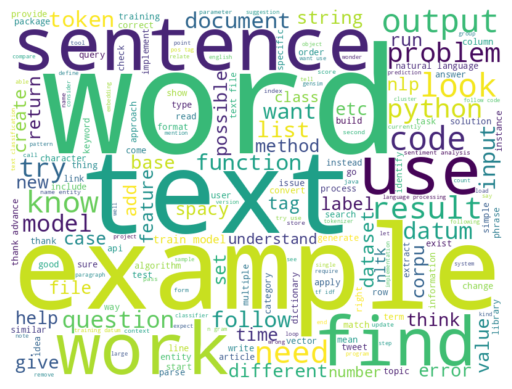

In [2]:
import data.data_analysis as analysis

analysis.word_cloud_for_text(data)

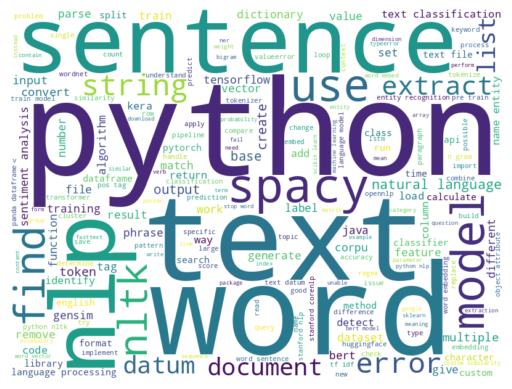

In [3]:
analysis.word_cloud_for_title(data)

In [21]:
sorted_terms = analysis.sort_by_idf_for_title(data)
print(sorted_terms[:5])

[('word', 2.9940480586124103), ('text', 3.1078910149515755), ('python', 3.194229217900301), ('model', 3.3336098960435177), ('nlp', 3.540257964323131)]


In [22]:
custom_stop_words = []
for term, score in sorted_terms:
    if score <= 4.5:
        custom_stop_words.append(term)

print(custom_stop_words)

['word', 'text', 'python', 'model', 'nlp', 'sentence', 'spacy', 'nltk', 'extract', 'language', 'string', 'use', 'error', 'find', 'list', 'datum', 'file', 'train']


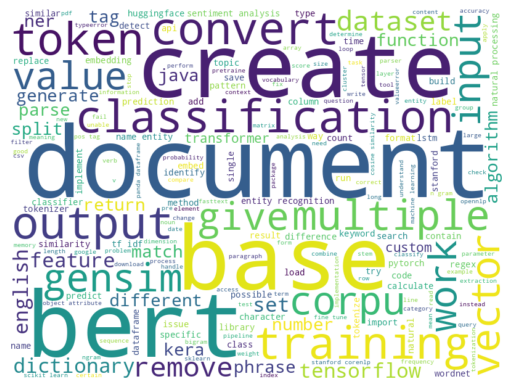

In [23]:
analysis.word_removal_for_title(data, custom_stop_words)

analysis.word_cloud_for_title(data)

### 3. Category Analysis


##### **Topic Modelling - Latent Dirichlet Allocation (LDA)**

In [7]:
import model.cluster_model as cluster

top_words_in_topic = cluster.lda_with_count_vectors(data, topics=15, topk=5)

for idx, top_words in enumerate(top_words_in_topic):
    print(f"Topic {idx}: {', '.join(top_words)}")

Topic 0: nltk, sentence, pos, tag, word
Topic 1: text, line, datum, label, file
Topic 2: gram, vector, similarity, document, feature
Topic 3: dataset, datum, training, train, model
Topic 4: face, huggingface, fine, tokenizer, model
Topic 5: use, text, user, api, question
Topic 6: extract, word, frequency, count, text
Topic 7: embed, vector, input, model, word
Topic 8: want, like, string, list, word
Topic 9: extract, ner, name, spacy, entity
Topic 10: file, dataframe, datum, column, text
Topic 11: matrix, gensim, term, topic, document
Topic 12: noun, stanford, parse, language, sentence
Topic 13: get, run, code, try, error
Topic 14: good, like, text, sentence, word


The LDA with count vector gives us the top five words of each topic as we think displaying the top 5 would be informative enough in providing high-level thematic insights. Since LDA gives different results every time we run, a random seed = 42 is set to ensure the reproducibility of results. For example, words in topic 10 (e.g. file, dataframe, datum, column, text) may be issues related to data reading and formatting. Also, wordings in topic 0 and 9 (e.g. nltk, pos, spacy, ner, entity) are common terms we see in data preprocessing stage. Further, words in topic 3 and 13 (e.g. training, train, try, error) are terms we usually see in Model Training and Testing stage. To conclude, the LDA using bad-of-words model provide certain level of evidence to support the categorisation design of ours.

In [24]:
top_words_in_topic = cluster.lda_with_tfidf_vectors(data, topics=15, topk=5)

for idx, top_words in enumerate(top_words_in_topic):
    print(f"Topic {idx}: {', '.join(top_words)}")

Topic 0: install, attributeerror, attribute, import, error
Topic 1: bertopic, lda, coherence, mallet, topic
Topic 2: deberta, smooth, deeppavlov, freqdist, bleu
Topic 3: sgd, acc, singularize, automodelforsequenceclassification, elmo
Topic 4: adapter, dynet, biobert, scispacy, bla
Topic 5: model, run, try, file, error
Topic 6: vbd, dt, jj, nnp, nn
Topic 7: bert, datum, error, train, model
Topic 8: like, list, sentence, text, word
Topic 9: noun, stanford, tag, sentence, entity
Topic 10: hunspell, chocolate, roc, codec, sentiwordnet
Topic 11: tp, tflearn, fn, fp, nmf
Topic 12: onnx, audio, triple, bengali, predicate
Topic 13: seller, deepspeech, synonymous, jwnl, verbnet
Topic 14: senna, subtree, abstractive, meteor, rouge


LDA with TF-IDF does not work well for providing insights on categorization. The TF-IDF weighting tends to emphasize on rare words that might be mispelled and not carrying any useful information, which result in several noisy and fragmented topics (e.g. topic 3 and 6). The topics and wordings are not providing meaningful insights compared to the bag-of-word approach.

##### **Document Clustering - K-means Clustering**


In [29]:
top_words_in_cluster = cluster.kmeans_with_tfidf_vectors(data, clusters=15, topk=5)     
        
for idx, top_terms in enumerate(top_words_in_cluster):
    print(f"Cluster {idx}: {', '.join(top_terms)}")

Cluster 0: remove, word, stopword, stop, punctuation
Cluster 1: model, train, layer, bert, training
Cluster 2: datum, feature, label, sentiment, text
Cluster 3: error, code, try, get, run
Cluster 4: column, dataframe, row, panda, text
Cluster 5: spacy, entity, ner, name, model
Cluster 6: word, vector, like, find, text
Cluster 7: language, natural, processing, english, text
Cluster 8: text, like, use, want, nlp
Cluster 9: idf, tf, document, word, value
Cluster 10: document, similarity, term, word, vector
Cluster 11: list, word, string, like, python
Cluster 12: topic, lda, document, model, modeling
Cluster 13: file, text, line, code, python
Cluster 14: sentence, word, like, text, want


The result present distinct clusters clearly grouping related terms. For instance, clusters related to formatting (e.g. "column, dataframe, row, panda, text"), preprocessing (e.g. "tag, pos, tagger, word, nltk" and "entity, name, ner, spacy, recognition"), feature engineering (e.g. "vector, embed, word, embedding, layer") and model training ("model, train, training, bert, datum" and "sentiment, analysis, negative, positive, review") provide non-overlapping thematic insights to support the categorization pipeline.

In [8]:
top_words_in_cluster = cluster.kmeans_with_word2vec(data, clusters=15, topk=5)
 
for i, tokens_per_cluster in enumerate(top_words_in_cluster):
    print(f"Cluster {i}: {', '.join(tokens_per_cluster)}")

Cluster 0: setence, ruler, biomedical, ner, recogniser
Cluster 1: elmo, backpropagate, fitting, flatten, logit
Cluster 2: unseen, embeding, unlabeled, xgboost, smo
Cluster 3: meaningful, essentially, aka, preset, phonetically
Cluster 4: parsed, lemmas, programmatically, morpheme, tagged
Cluster 5: passage, precisely, diverse, subtext, nonsense
Cluster 6: compile, successfully, execute, import, cmd
Cluster 7: essentially, corresponding, suppose, counter, associative
Cluster 8: seperate, hyphenate, jumble, mwe, put
Cluster 9: model, embeding, finetune, llama, fastai
Cluster 10: align, embeding, embedding, vector, glove
Cluster 11: paraphrase, ruby, hebrew, wordninja, gujarati
Cluster 12: seperate, df, dataframe, column, pretend
Cluster 13: unpickle, rerun, excerpt, attempt, everytime
Cluster 14: centroid, vectorizing, vectorise, frequence, weightage


The k-means clustering with Word2Vec results show several clusters with ambiguous, unrelated or mixed terms. This is most likely due to the averaging of word embeddings to form document vectors, which dilutes the contextual and semantic signals. These wordings especially adjectives do not directly map to the proposed categorisation pipeline stages. The inconsistency makes it difficult to use the clusters result as a basis for categorisation. 

##### **Topic Labelling - BERTopic**

In [17]:
import model.cluster_model as cluster

In [19]:
# create and fit BERTopic model and set the grouping of topics into 15 clusters
topics, topic_info = cluster.get_bert_topic(data['cleaned_text'], n=15)
topic_info

,Topic,Count,Name,Representation,Representative_Docs
0,-1,9709,-1_word_text_model_sentence,"[word, text, model, sentence, like, try, use, ...",[error keras nlp model training matrix type co...
1,0,4652,0_word_text_like_sentence,"[word, text, like, sentence, want, use, exampl...",[topic sentence pre trained model list sentenc...
2,1,1917,1_similarity_word_column_list,"[similarity, word, column, list, dataframe, do...",[find similarity sentence sentence python want...
3,2,1621,2_model_bert_train_embed,"[model, bert, train, embed, vector, word, embe...",[obtain bert sentence embedding vector module ...
4,3,886,3_error_try_run_import,"[error, try, run, import, code, install, model...",[get spacy error module name package try test ...
5,4,483,4_spacy_remove_tokenizer_token,"[spacy, remove, tokenizer, token, word, emoji,...",[remove word string affect word python spacy s...
6,5,216,5_spark_pyspark_memory_process,"[spark, pyspark, memory, process, run, code, f...",[share complex spacy nlp model multiple python...
7,6,206,6_file_json_line_format,"[file, json, line, format, csv, code, list, er...",[create data frame text file text file line fi...
8,7,93,7_tweet_twitter_sentiment_datum,"[tweet, twitter, sentiment, datum, analysis, p...",[twitter api use extract large amount tweet nl...
9,8,86,8_scrape_url_page_html,"[scrape, url, page, html, website, web, extrac...",[web scrape python arabic text try web scrape ...


The BERTopic results inspired a task-based and keyword-based for our sub-categories. For example, a topic with “column, dataframe, row, panda, text” directly inspired the sub-categories of data extraction and format conversion under Data Reading and Formatting stage. Similarly, a topic featuring “parser, pos, tag, nltk” inspired our Data Preprocessing sub-categories by emphasizing tokenization and linguistic analysis. Moreover, clusters showing terms like “tfidf, matrix, term, document” and “vector, embed, similarity” validated our Feature Engineering sub-categories, while topics with “model, train, bert” informed our Model Training/Testing and "perplexity, bleu, calculate, precision" informed Performance Evaluation sub-categories. These focused clusters clearly reflect real-world issues, providing solid, data-driven inspiration for our task-based categorization pipeline.

Topic -1 is usually assumed to be irrelevant as they cannot clearly fit into any of the main topic clusters. Yet, the large number of count of topic -1, 0, 1 may potentially mask hidden sub-themes. Thus a more detailed investigation on these three topics will be performed using BERTopic to see if more insights can be obtained.

In [20]:
# dig deeper into topic -1 (outliers group)

# extract documents that were assigned to topic -1
subset_negative_1 = [doc for doc, topic in zip(data['cleaned_text'], topics) if topic == -1]

# create new BERTopic model to analyse the group and set the grouping of topics to 10 clusters
subset_topics_negative_1, subset_topic_info_negative_1 = cluster.get_bert_topic(subset_negative_1, n=10)
subset_topic_info_negative_1

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6468,-1_word_text_model_sentence,"[word, text, model, sentence, like, try, use, ...",[test nlp model string train classifier model ...
1,0,1690,0_word_sentence_text_like,"[word, sentence, text, like, extract, stanford...",[implement fuzzy search suggestion word comple...
2,1,720,1_model_train_layer_embed,"[model, train, layer, embed, word, datum, use,...",[keras sequence classification python try perf...
3,2,587,2_error_try_spacy_run,"[error, try, spacy, run, code, file, get, load...",[give output false code give follow error try ...
4,3,84,3_bert_model_error_tokenizer,"[bert, model, error, tokenizer, save, gpu, fin...",[runtimeerror element tensor require grad face...
5,4,75,4_transformer_mask_model_huggingface,"[transformer, mask, model, huggingface, token,...",[good way hug face mask fill mask token time a...
6,5,30,5_recall_confusion_precision_matrix,"[recall, confusion, precision, matrix, accurac...",[compute confusion matrix spacy scorer example...
7,6,30,6_pinyin_ocr_language_kana,"[pinyin, ocr, language, kana, japanese, tesser...",[language detection tesseract ocr mainly invoi...
8,7,14,7_maltparser_parser_parse_servlet,"[maltparser, parser, parse, servlet, method, m...",[maltparser work maltparser nltk process text ...
9,8,11,8_watson_ibm_understanding_natural,"[watson, ibm, understanding, natural, language...",[way ibm natural language understand output xm...


Some of the topics after zooming into the outlier group -1 are similar to the main BERTopic analysis. The topics in the group contain mix of generic and noisy terms that do not deliver clear and coherant themes that give inspirations to the sub-categories. To conclude, the overall BERTopic analysis of this group do not provide valuable insights.

In [ ]:
# Dig deeper into Topic 0 (Topic 0 here is the one from the overall BERT).

# extract documents that were assigned to topic 0
subset_0 = [doc for doc, topic in zip(data['cleaned_text'], topics) if topic == 0]

# create new BERTopic model to analyse the group and set the grouping of topics to 10 clusters
subset_topics_0, subset_topic_info_0 = cluster.get_bert_topic(subset_0, n=10)
subset_topic_info_0

,Topic,Count,Name,Representation,Representative_Docs
0,-1,386,-1_text_word_sentence_university,"[text, word, sentence, university, like, extra...",[index substre original text work natural lang...
1,0,3339,0_word_sentence_like_text,"[word, sentence, like, text, try, example, wan...",[python way nlp library combine word state pos...
2,1,1078,1_similarity_topic_document_cluster,"[similarity, topic, document, cluster, word, c...",[use cosine similarity read paper think unders...
3,2,750,2_column_dataframe_list_word,"[column, dataframe, list, word, row, remove, t...",[compare row panda datum frame panda df column...
4,3,636,3_intent_language_chatbot_bot,"[intent, language, chatbot, bot, user, like, e...",[intent chatbot numeric string datum try build...
5,4,186,4_url_address_scrape_extract,"[url, address, scrape, extract, html, page, te...",[web scrape text unstructured webpage beautifu...
6,5,151,5_pdf_extract_text_file,"[pdf, extract, text, file, table, page, docume...",[read table image pdf nlp tool nlp assignment ...
7,6,83,6_lucene_search_elasticsearch_index,"[lucene, search, elasticsearch, index, query, ...",[approach suggestiosn classify keyword search ...
8,7,44,7_plot_word_frequency_graph,"[plot, word, frequency, graph, axis, like, dat...",[plot word topic stm possible plot word topic ...
9,8,31,8_perplexity_bleu_score_calculate,"[perplexity, bleu, score, calculate, model, to...",[perplexity token average perplexity perplexit...


The dive into the topic 0 of the entire BERtopic analysis gives a bit of interesting insights of the sub-categories design and support of the structure of the categorisation pipeline. The topic 2 ("spacy, ner") is clearly something in data preprocessing stage and NER can be regarded as a task-based or keywords-based sub-category. In addition, wordings in topic 5 ("regex, match") gives inspiration of creating one sub-category under data preprocessing of Regex. Topic 7 wordings are something we can address using lemmatization/stemming sub-category, supporting the necessity of this sub-category.

In [ ]:
# Dig deeper into Topic 1 (Topic 1 here is the one from the overall BERT).

# extract documents that were assigned to topic 1
subset_1 = [doc for doc, topic in zip(data['cleaned_text'], topics) if topic == 1]

# create new BERTopic model to analyse the group and set the grouping of topics to 10 clusters
subset_topics_1, subset_topic_info_1 = cluster.get_bert_topic(subset_1, n=10)
subset_topic_info_1

,Topic,Count,Name,Representation,Representative_Docs
0,-1,143,-1_model_layer_embed_word,"[model, layer, embed, word, sentence, loss, em...",[export embed matrix word tensorflow code vari...
1,0,513,0_bert_model_sentence_error,"[bert, model, sentence, error, fine, use, try,...",[way use bert large text classification tool f...
2,1,462,1_model_spacy_train_training,"[model, spacy, train, training, ner, entity, d...",[create custom ner spacy want train additional...
3,2,412,2_document_idf_feature_text,"[document, idf, feature, text, tf, classifier,...",[tf idf value add find document similarity wor...
4,3,340,3_word_vector_embed_embedding,"[word, vector, embed, embedding, glove, model,...",[add miss word vector pre train model gensim l...
5,4,55,4_model_save_hug_train,"[model, save, hug, train, face, checkpoint, tr...",[hug face model pre trained train want use hug...
6,5,45,5_tensor_tensorflow_shape_pytorch,"[tensor, tensorflow, shape, pytorch, layer, di...",[gathering list d tensor d tensor keras d tens...
7,6,24,6_imbalance_class_smote_dataset,"[imbalance, class, smote, dataset, oversample,...",[text classification imbalance datum try class...
8,7,16,7_loss_training_accuracy_validation,"[loss, training, accuracy, validation, value, ...",[model loss value decrease slowly reduce loss ...
9,8,14,8_label_multi_column_headline,"[label, multi, column, headline, movie, multil...",[multilabelbinarizer return null value hi imdb...


Most of the topics after digging deep into topic 1 from the entire BERTopic analysis inspires mostly the sub-categories in Model Training and Testing stage. Topic 2, 7 and 8 featuring keywords like "transformer, train, loss, epoch, checkpoint, save" stimulate the Model Training and Fine-tuning sub-category as they are common terms when we train on NLP models.

### 4. Post Classification

In [3]:
import model.classify_model as classifier

tfm_classifier, tfm_tokenizer = classifier.transformer_model_init()

==((====))==  Unsloth 2025.3.19: Fast Llama patching. Transformers: 4.51.3.
   \\   /|    NVIDIA GeForce RTX 4090. Num GPUs = 1. Max memory: 23.635 GB. Platform: Linux.
O^O/ \_/ \    Torch: 2.6.0+cu124. CUDA: 8.9. CUDA Toolkit: 12.4. Triton: 3.2.0
\        /    Bfloat16 = TRUE. FA [Xformers = 0.0.29.post3. FA2 = False]
 "-____-"     Free license: http://github.com/unslothai/unsloth
Unsloth: Fast downloading is enabled - ignore downloading bars which are red colored!


In [2]:
prompt_style = """
Below is an instruction that describes a task, paired with an input that provides further context. 
Write a response that appropriately completes the request. 

### Instruction:
You are an NLP expert experienced in categorizing developer questions from Stack Overflow.  
Your task is to classify the question below into **one and only one** most appropriate NLP pipeline category from the list provided.
You **must** strictly follow the response format, **only** return the result in the format: Final classification ID: X.

### Categories:
1. Data Reading and Formatting  
   - Data Extraction (e.g., extracting text from APIs, databases, scraping)  
   - Format Conversion (e.g., JSON to CSV, XML to TXT)  
   - Reading corpora/files (e.g., reading PDFs, CSVs, or raw text)

2. Data Preprocessing  
   - Tokenization, Lemmatization, Stemming  
   - Stop-word Removal, Lowercasing  
   - Handling Class Imbalance (upsampling/downsampling)  
   - Named Entity Recognition (NER), Part-of-Speech (POS) tagging  
   - Cleaning using Regex, removing noise characters, normalization  

3. Data Visualisation  
   - Word Frequency analysis  
   - Wordcloud generation  
   - Bar plots, histograms of token counts or class distributions

4. Feature Engineering  
   - TF-IDF, Bag-of-Words  
   - Word Embeddings (e.g., Word2Vec, GloVe, BERT embeddings)  
   - Text Similarity Analysis  
   - Topic Modelling (e.g., LDA, NMF)

5. Model Selection  
   - Choosing or comparing models (e.g., which model to use)  
   - Transfer learning options  
   - Choosing between classification/regression models

6. Model Training and Testing  
   - Train/test/validation split strategies  
   - Sentiment Analysis models, text classification  
   - Regression models on text data  
   - Fine-tuning pre-trained models, hyperparameter tuning

7. Model Performance Evaluation  
   - Evaluation metrics (e.g., F1, precision, recall, BLEU, ROUGE)  
   - Cross-validation techniques  
   - Confusion matrix, AUC-ROC, etc.

8. Other  
   - Any topics not covered above  

### Question:
(The following is the actual question from Stack Overflow.)
{}
(The question from Stack Overflow ends here, you need to categorize it.)

### Response Format:
Final classification ID: X  

### Response:
<think>
"""

We selected one sample question from the previous BERTopic results to test the model’s output. As we can see, it's mainly about data formating, the user was trying to convert the format. Therefore, it should belong to category 1.

In [ ]:
# In this test, we simply combined the tile and text
combined_text = data["title"].str.cat(data["body"], sep=" ")

json_topic_from_bert = [doc for doc, topic in zip(combined_text, topics) if topic == 6]
json_topic_from_bert[3][:200]

'How to convert Doccano exported JSONL format to spaCy format？ <p>I want to use my own data set to train a named entity recognition model. The data set is exported by the annotation tool Doccano. The f'

In [26]:
example_input = prompt_style.format(json_topic_from_bert[3], "")

example_output = classifier.question_classify(tfm_classifier, tfm_tokenizer, example_input)

The model correctly identified the appropriate category and reasonably excluded some of the others. This result suggests that the classification approach is both feasible and consistent with human judg-ment.

In [27]:
print(example_output)


<think>
Okay, so I need to figure out how to convert Doccano's JSONL format to spaCy format. The user is trying to train a named entity recognition model using their own dataset that's exported from Doccano. They mentioned that spaCy doesn't support JSONL directly, so they need a way to convert it.

First, I should understand what JSONL is. JSONL stands for JSON Lines, where each line is a separate JSON object. In Doccano, the dataset is exported as JSONL, which means each line is a separate entry with text and entities.

Now, spaCy expects data in a specific format. It can read JSON, CSV, or text files. Since the data is in JSONL, the user needs to convert each JSONL line into spaCy's format, which is typically a list of dictionaries, each representing a token with attributes like text, position, and entity information.

So, the steps would involve reading each line of the JSONL file, parsing it into a dictionary, and then converting it into spaCy's format. This might involve writing

In [13]:
classified_df = classifier.classify_all(
    data,
    tfm_classifier,
    tfm_tokenizer,
    prompt_style,
    batch_size=10,
    max_chars=2000,
    max_tokens=512,
)

Classifying: 100%|██████████| 2000/2000 [11:40:47<00:00, 21.02s/it]  


We extract the classification result by identifying the field labeled “Final classification ID” in the model’s output. If this field cannot be retrieved, the instance is marked as Class 0, indicating a classification failure.

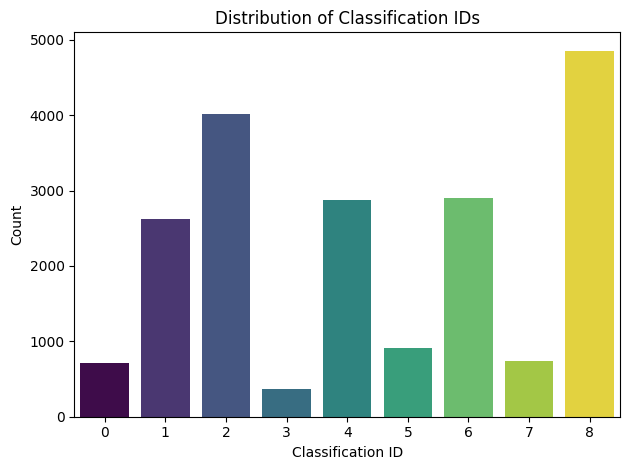

In [3]:
classifier.result_visualize(classified_df)

By analyzing these cases, we identified several primary factors that led to the model’s failure to pro-duce a classification result: (1) The model’s reasoning chain was too long and exceeded the output limit. (2) The model fell into repetitive loops, endlessly repeating certain phrases. (3) The model treated the input question as a task to be solved rather than categorized.

In [ ]:
classified_df[classified_df['classification_id'] == 0].head(10)

,q_id,classification_id,response_text
113,53015099,0,"\n<think>\n\nAlright, I need to figure out how..."
136,73032656,0,"\n<think>\n\n\nAlright, so I'm trying to figur..."
220,70698947,0,"\n<think>\n\nOkay, so I'm trying to figure out..."
222,79253283,0,"\n<think>\n\nAlright, so I'm trying to figure ..."
228,79227390,0,"\n<think>\n\nOkay, so I'm trying to figure out..."
258,79195169,0,"\n<think>\n\nAlright, so I'm trying to figure ..."
274,78437749,0,"\n<think>\n\nOkay, let me try to figure this o..."
276,79148979,0,"\n<think>\n\nAlright, so I'm trying to figure ..."
324,59384146,0,"\n<think>\n\n\nOkay, so I'm trying to figure o..."
421,78937220,0,"\n<think>\n\nOkay, so I'm trying to figure out..."


Save the complete classification results together with the corresponding problem description information in a unified manner.

In [ ]:
merged_df = classified_df.merge(data[['q_id', 'link', 'title', 'body']], on='q_id', how='left')
merged_df.to_csv("classified_output.csv", encoding="utf-8", index=False)

### 7. Evaluation

To evaluate the overall performance of the model, we manually annotated 15 samples for each of the eight categories, including Other category, resulting in a dataset of 120 samples in total.

In [ ]:
import pandas as pd

annotated_data = pd.read_csv('data/annotated_data.csv')

annotated_data_clf_res = classifier.classify_all(
    annotated_data,
    tfm_classifier,
    tfm_tokenizer,
    prompt_style,
    batch_size=12,
    max_chars=2000,
    max_tokens=4096,
)

Classifying:   0%|          | 0/10 [00:00<?, ?it/s]

Classifying: 100%|██████████| 10/10 [13:24<00:00, 80.45s/it] 


The model achieved an overall accuracy of 0.43, which differs to some extent from human judgment. This is understandable, as we intentionally retained some ambiguous questions. Due to our original design, each question must be assigned a single category. However, during manual annotation, we found that some questions could reasonably fall under multiple categories. By inspecting the model’s chain of thought on these cases, we observed that while it struggled to assign a single definitive label, many of its candidate options were in fact reasonable.

In [ ]:
from sklearn.metrics import classification_report, accuracy_score

# Concat the model result and the human-annotated data on question ids
merged_eval = annotated_data[["q_id", "annotated_id"]].merge(
    annotated_data_clf_res[["q_id", "classification_id"]], on="q_id"
)

y_true = merged_eval["annotated_id"]
y_pred = merged_eval["classification_id"]

print("Accuracy:", accuracy_score(y_true, y_pred))
print(
    "\nClassification Report:\n", classification_report(y_true, y_pred, zero_division=0)
)

Accuracy: 0.43333333333333335

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.58      0.47      0.52        15
           2       0.44      0.27      0.33        15
           3       0.57      0.53      0.55        15
           4       0.67      0.53      0.59        15
           5       1.00      0.40      0.57        15
           6       0.35      0.47      0.40        15
           7       0.58      0.47      0.52        15
           8       0.24      0.33      0.28        15

    accuracy                           0.43       120
   macro avg       0.49      0.39      0.42       120
weighted avg       0.55      0.43      0.47       120

